In [1]:
# imports 
from pyforest import *
import warnings
warnings.filterwarnings('ignore')
lazy_imports()

['from sklearn.feature_extraction.text import TfidfVectorizer',
 'import tqdm',
 'from scipy import stats',
 'import statistics',
 'import datetime as dt',
 'import torch',
 'import skimage',
 'from statsmodels.tsa.arima_model import ARIMA',
 'from sklearn.linear_model import LassoCV',
 'from pathlib import Path',
 'import matplotlib.pyplot as plt',
 'import altair as alt',
 'import statsmodels.api as sm',
 'from scipy import signal as sg',
 'from sklearn.preprocessing import LabelEncoder',
 'import plotly.graph_objs as go',
 'import bokeh',
 'from sklearn.linear_model import LogisticRegression',
 'from sklearn.linear_model import ElasticNet',
 'from sklearn.model_selection import GridSearchCV',
 'from sklearn.manifold import TSNE',
 'import pickle',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'import imutils',
 'from sklearn.model_selection import KFold',
 'import plotly.express as px',
 'import numpy as np',
 'from pyspark import SparkContext',
 'from sklearn.preproc

In [2]:
# read dataset
df_covid = pd.read_csv('dataset/imputed-data.csv',header = 0)
df_covid.head()

<IPython.core.display.Javascript object>

,date,county_fips,county_name,state_fips,state_name,covid_19_confirmed_cases,covid_19_deaths,social_distancing_total_grade,social_distancing_visitation_grade,social_distancing_encounters_grade,...,age_55_59,age_60_64,age_65_69,age_70_74,age_75_79,age_80_84,age_85_or_higher,immigrant_student_ratio,death_ratio,population_ratio_in_state
0,2020/01/22,1003,Baldwin County,1,Alabama,0.0,0.0,F,F,F,...,7,7,6,4,3,2,2,0.021048,0.010811,4.46047
1,2020/01/23,1003,Baldwin County,1,Alabama,0.0,0.0,F,F,F,...,7,7,6,4,3,2,2,0.021048,0.010811,4.46047
2,2020/01/24,1003,Baldwin County,1,Alabama,0.0,0.0,F,F,F,...,7,7,6,4,3,2,2,0.021048,0.010811,4.46047
3,2020/01/25,1003,Baldwin County,1,Alabama,0.0,0.0,F,F,F,...,7,7,6,4,3,2,2,0.021048,0.010811,4.46047
4,2020/01/26,1003,Baldwin County,1,Alabama,0.0,0.0,F,F,F,...,7,7,6,4,3,2,2,0.021048,0.010811,4.46047


In [3]:
# df_informations
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992266 entries, 0 to 992265
Data columns (total 64 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   date                                           992266 non-null  object 
 1   county_fips                                    992266 non-null  int64  
 2   county_name                                    992266 non-null  object 
 3   state_fips                                     992266 non-null  int64  
 4   state_name                                     992266 non-null  object 
 5   covid_19_confirmed_cases                       992266 non-null  float64
 6   covid_19_deaths                                992266 non-null  float64
 7   social_distancing_total_grade                  992266 non-null  object 
 8   social_distancing_visitation_grade             992266 non-null  object 
 9   social_distancing_encounters_grade   

In [4]:
# droping county and state name
# df_covid.drop(['county_name','state_name'],inplace = True, axis = 1)

DROPPED THE STRING COUNTERPARTS OF COUNTY_NAME AND STATE_NAME

In [5]:
# keeping columns name 
col_list = df_covid.columns
col_list

Index(['date', 'county_fips', 'county_name', 'state_fips', 'state_name',
       'covid_19_confirmed_cases', 'covid_19_deaths',
       'social_distancing_total_grade', 'social_distancing_visitation_grade',
       'social_distancing_encounters_grade',
       'social_distancing_travel_distance_grade',
       'retail_and_recreation_mobility_percent_change',
       'grocery_and_pharmacy_mobility_percent_change',
       'workplaces_mobility_percent_change', 'daily_state_test',
       'precipitation', 'temperature', 'percent_of_vaccinated_residents',
       'virus_pressure', 'total_population', 'proportion_female', 'area',
       'population_density', 'latitude', 'longitude', 'hospital_beds_ratio',
       'ventilator_capacity_ratio', 'intensive_care_unit_(ICU)_bed_ratio',
       'housing_density', 'less_than_high_school_diploma',
       'high_school_diploma_only', 'some_college_or_higher',
       'academic_population_ratio', 'percent_of_smokers',
       'percent_of_diabetes', 'religious_congr

In [6]:
# date as date format
df_covid['date'] = pd.to_datetime(df_covid['date'])
df_covid['date'].head()

<IPython.core.display.Javascript object>

0   2020-01-22
1   2020-01-23
2   2020-01-24
3   2020-01-25
4   2020-01-26
Name: date, dtype: datetime64[ns]

CONVERTED DATE STRING TO DATE FORMAT

In [7]:
# max date
df_covid['date'].max()

Timestamp('2021-06-10 00:00:00')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

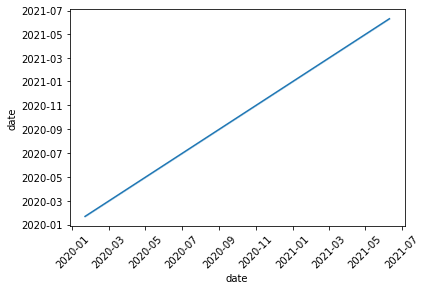

In [8]:
# checking pattern of date
sns.lineplot(x = 'date',y = 'date',data = df_covid )
plt.xticks(rotation=45);
plt.show()

OUR DATETIME IS CONTINUOUS

In [9]:
# country fipes unique len
len(df_covid.county_fips.unique())

1961

In [10]:
# state fipes unique
len(df_covid.state_fips.value_counts())

49

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='temperature', ylabel='covid_19_confirmed_cases'>

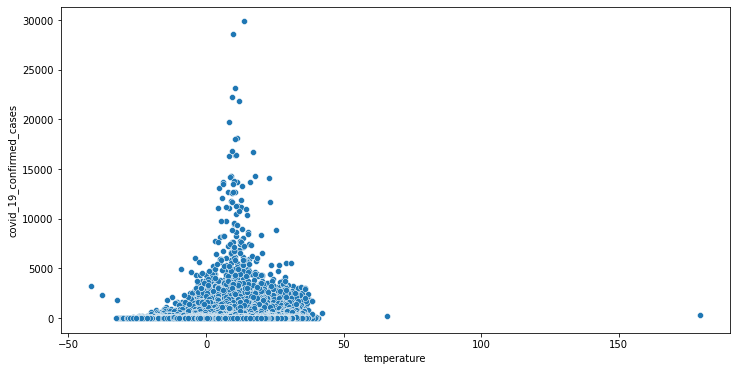

In [11]:
# overall temperature vs covid cases
plt.figure(figsize = (12,6))
sns.scatterplot(x = 'temperature',y = 'covid_19_confirmed_cases',data = df_covid)

MAJORITY OF THE CASES ARE DETECTED WHEN TEMPERATURE IS BETWEEN -15 TO 40

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='date', ylabel='covid_19_confirmed_cases'>

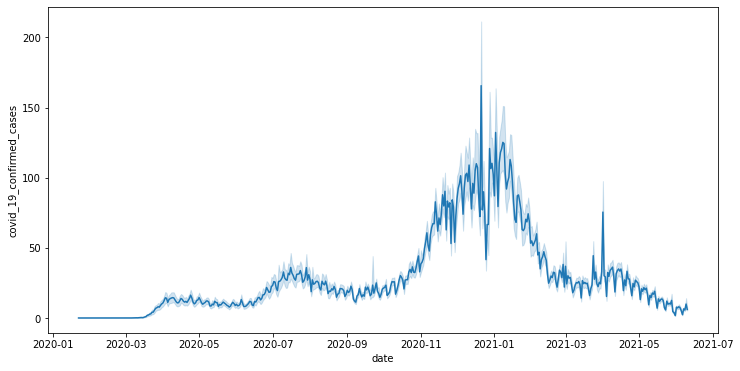

In [12]:
# overall date vs covid cases
plt.figure(figsize = (12,6))
sns.lineplot(x = 'date', y = 'covid_19_confirmed_cases', data = df_covid)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='date', ylabel='daily_state_test'>

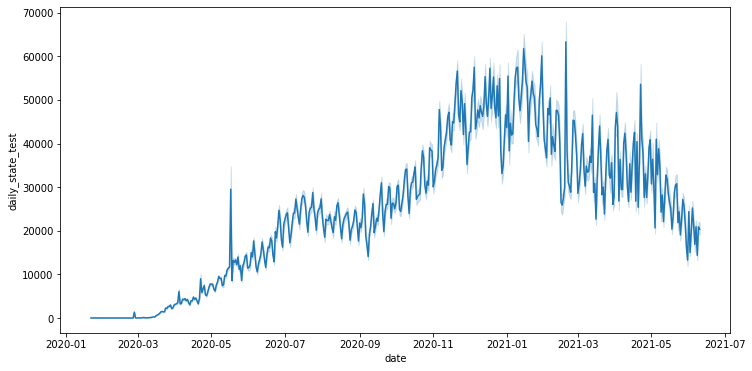

In [13]:
# overall date vs daily_state_test
plt.figure(figsize = (12,6))
sns.lineplot(x = 'date', y = 'daily_state_test', data = df_covid)

DAILY TEST INCREASED BASED ON COVID CASES INCREASE

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='date', ylabel='temperature'>

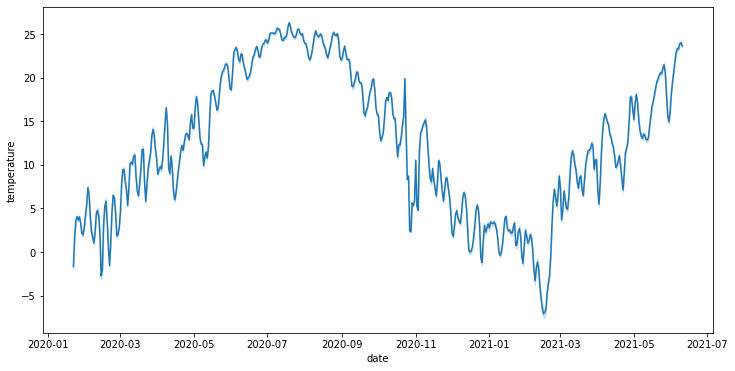

In [14]:
# overall date vs temp
plt.figure(figsize = (12,6))
sns.lineplot(x = 'date', y = 'temperature', data = df_covid)

In [15]:
# overall temp vs cases
df_covid[['temperature','covid_19_confirmed_cases','precipitation']].corr()

,temperature,covid_19_confirmed_cases,precipitation
temperature,1.000000,-0.023208,0.076432
covid_19_confirmed_cases,-0.023208,1.000000,-0.007544
precipitation,0.076432,-0.007544,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='date', ylabel='covid_19_confirmed_cases'>

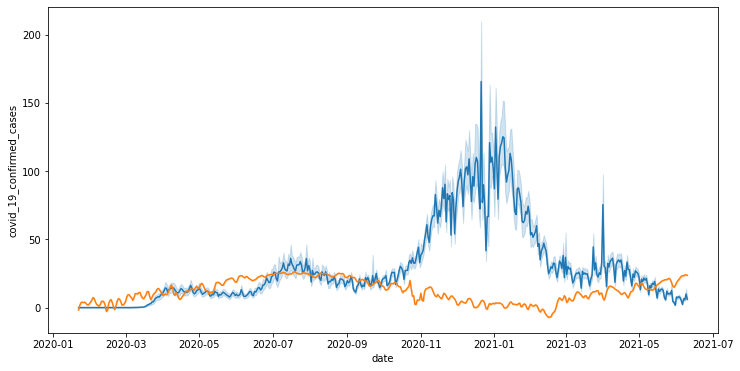

In [16]:
plt.figure(figsize = (12,6))
sns.lineplot(x = 'date', y = 'covid_19_confirmed_cases', data = df_covid)
sns.lineplot(x = 'date', y = 'temperature', data = df_covid)
#sns.lineplot(x = 'date', y = 'precipitation', data = df_covid)

DURING WINTERS CASES INCREASED, MAY BE BECAUSE PEOPLE STAYING MOSTLY INSIDE PUBLIC PLACE WHICH WAS A MAJOR FACTOR OF CASE SPREAD, DIRECTLY THEY ARE NOT CORRELATED. PRECIPITATION HAS NO RELATION.

In [60]:
# top high POPULATED counties
high_case = df_covid[df_covid['date'] == '2020-02-01'].groupby(['state_fips'])['total_population'].sum().sort_values(ascending = False)
high_case_10 = list(high_case.index[:10])
high_case_10

[6, 48, 12, 36, 42, 17, 37, 39, 26, 34]

In [ ]:
# TOP 10 STATES 
plt.figure(figsize = (12,6))
df_covid[df_covid['state_fips'].isin(['high_case_10'])]
sns.barplot(x = 'state_name',y = 'total_population',order = df_covid['total_population'],
            data = df_covid[df_covid['state_fips'].isin(high_case_10)])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

THIS ARE THE TOP STATES BASED ON POPULATION DENSITY AND THE FOLLOWING WILL BE USED FOR FURTHER ANALYSIS

In [19]:
# number of counties in top high case counties
for i in high_case_10:
    print(i," : ",len(df_covid[df_covid['state_fips'] ==i]['county_fips'].unique()))

34  :  18
36  :  54
25  :  14
44  :  4
6  :  54
9  :  7
10  :  3
24  :  17
51  :  61
42  :  55


In [20]:
# t test one sample to check if sample qualify as a representation of population
from scipy import stats
def one_sample_one_tailed(sample_data, popmean, alpha=0.05, alternative='two-sided'):
    t, p = stats.ttest_1samp(sample_data, popmean)
    print ('t:',t)
    print ('p:',p)
    if alternative == 'greater' and (p/2 < alpha) and t > 0:
        print ('Reject Null Hypothesis for greater-than test')
    if alternative == 'less' and (p/2 < alpha) and t < 0:
        print ('Reject Null Hypothesis for less-thane test')
    if alternative == 'two-sided' and (p/2 < alpha) and t != 0:
        print ('Reject Null Hypothesis for not-equal test') 
one_sample_one_tailed(df_covid[df_covid['state_fips'].isin(high_case_10)]['population_density']
                      ,df_covid['population_density'].mean())  

t: 60.956343643152465
p: 0.0
Reject Null Hypothesis for not-equal test


In [21]:
print(df_covid[df_covid['state_fips'].isin(high_case_10)]['population_density'].mean())
print(df_covid['population_density'].mean())

1070.1621946717457
310.43229803408644


T TEST PASSES FOR OUR SAMPLE

In [22]:
# groupby for top population
covid_climate = df_covid[df_covid['state_fips'].isin(high_case_10)].groupby(['date',
                                                             'state_fips'])[['covid_19_confirmed_cases',
                'covid_19_deaths','daily_state_test','precipitation','temperature','virus_pressure']].sum().reset_index()
covid_climate.head()

,date,state_fips,covid_19_confirmed_cases,covid_19_deaths,daily_state_test,precipitation,temperature,virus_pressure
0,2020-01-22,6,0.0,0.0,54.0,1359.6,408.70,0.0
1,2020-01-22,9,0.0,0.0,0.0,0.0,-50.50,0.0
2,2020-01-22,10,0.0,0.0,0.0,0.0,-3.20,0.0
3,2020-01-22,24,0.0,0.0,0.0,108.4,-59.22,0.0
4,2020-01-22,25,0.0,0.0,14.0,24.8,-104.36,0.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1440x1440 with 0 Axes>

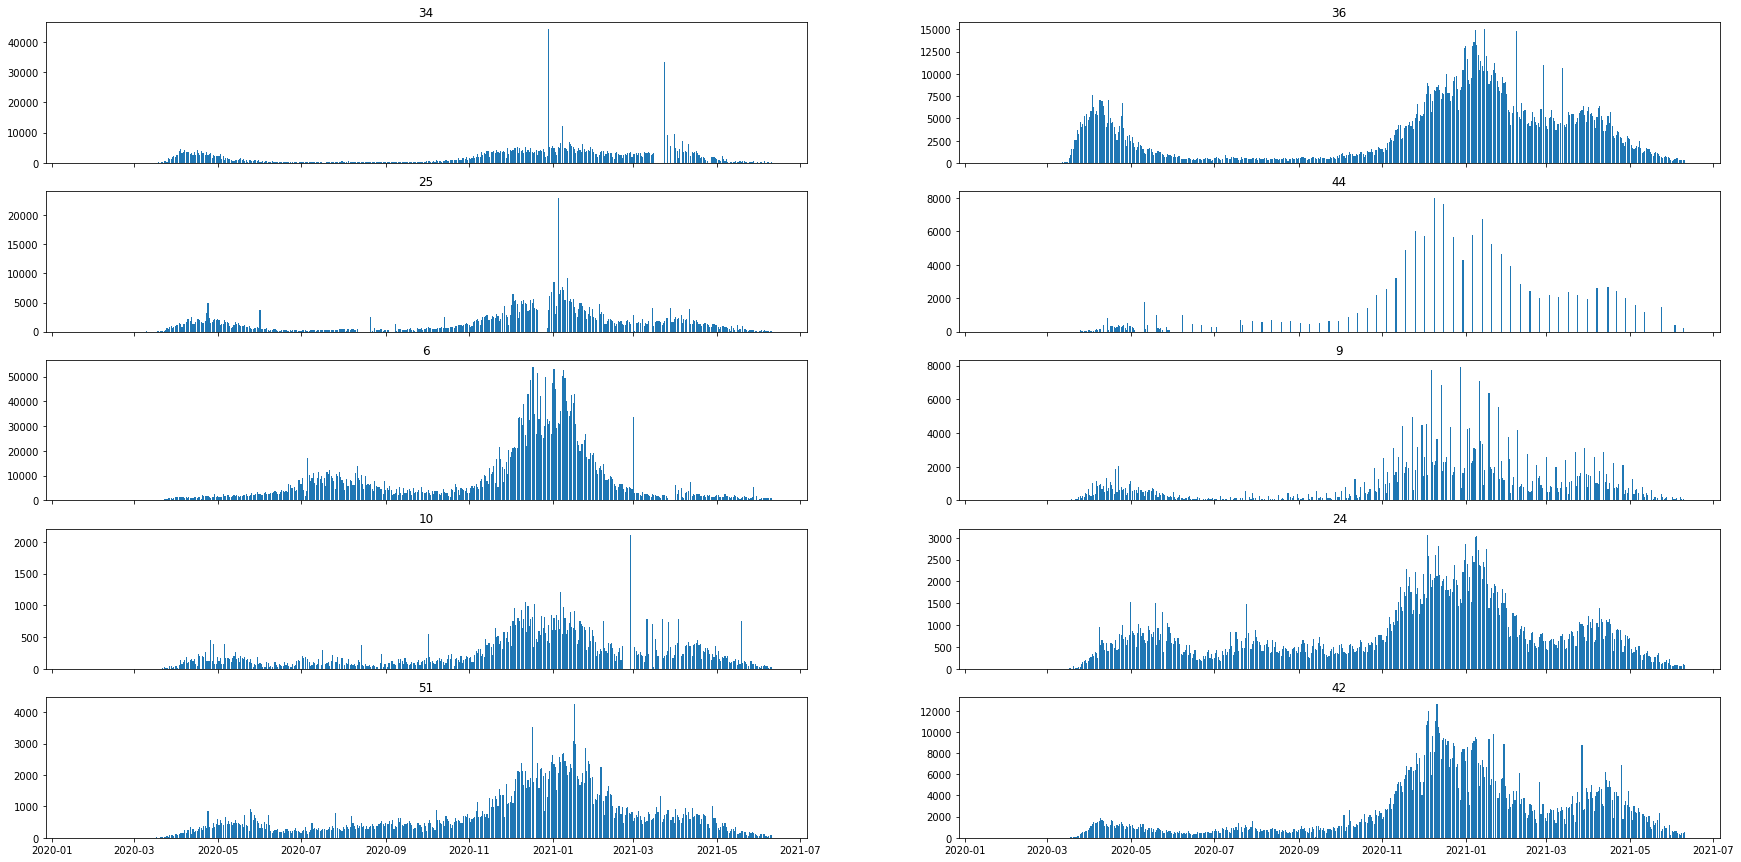

In [23]:
#top states with covid_19_confirmed_cases
plt.figure(figsize = (20,20))
fig,axes = plt.subplots(5,2,sharex = True,figsize = (30,15))

for i,ax in zip(high_case_10, axes.flat):    
    ax.bar(covid_climate.loc[np.where(covid_climate["state_fips"] == i)[0],'date'],covid_climate.loc[
        np.where(covid_climate["state_fips"] == i)[0],'covid_19_confirmed_cases'])
    ax.set_title(i)
    plt.title(str(i))

THE COVID CASES ARE NOT ACCUMULATED ! ALSO ALL STATES HAVE A SIMILAR PATTERN STATING THAT MAJOR SPREAD DURING WINTERS

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 864x432 with 0 Axes>

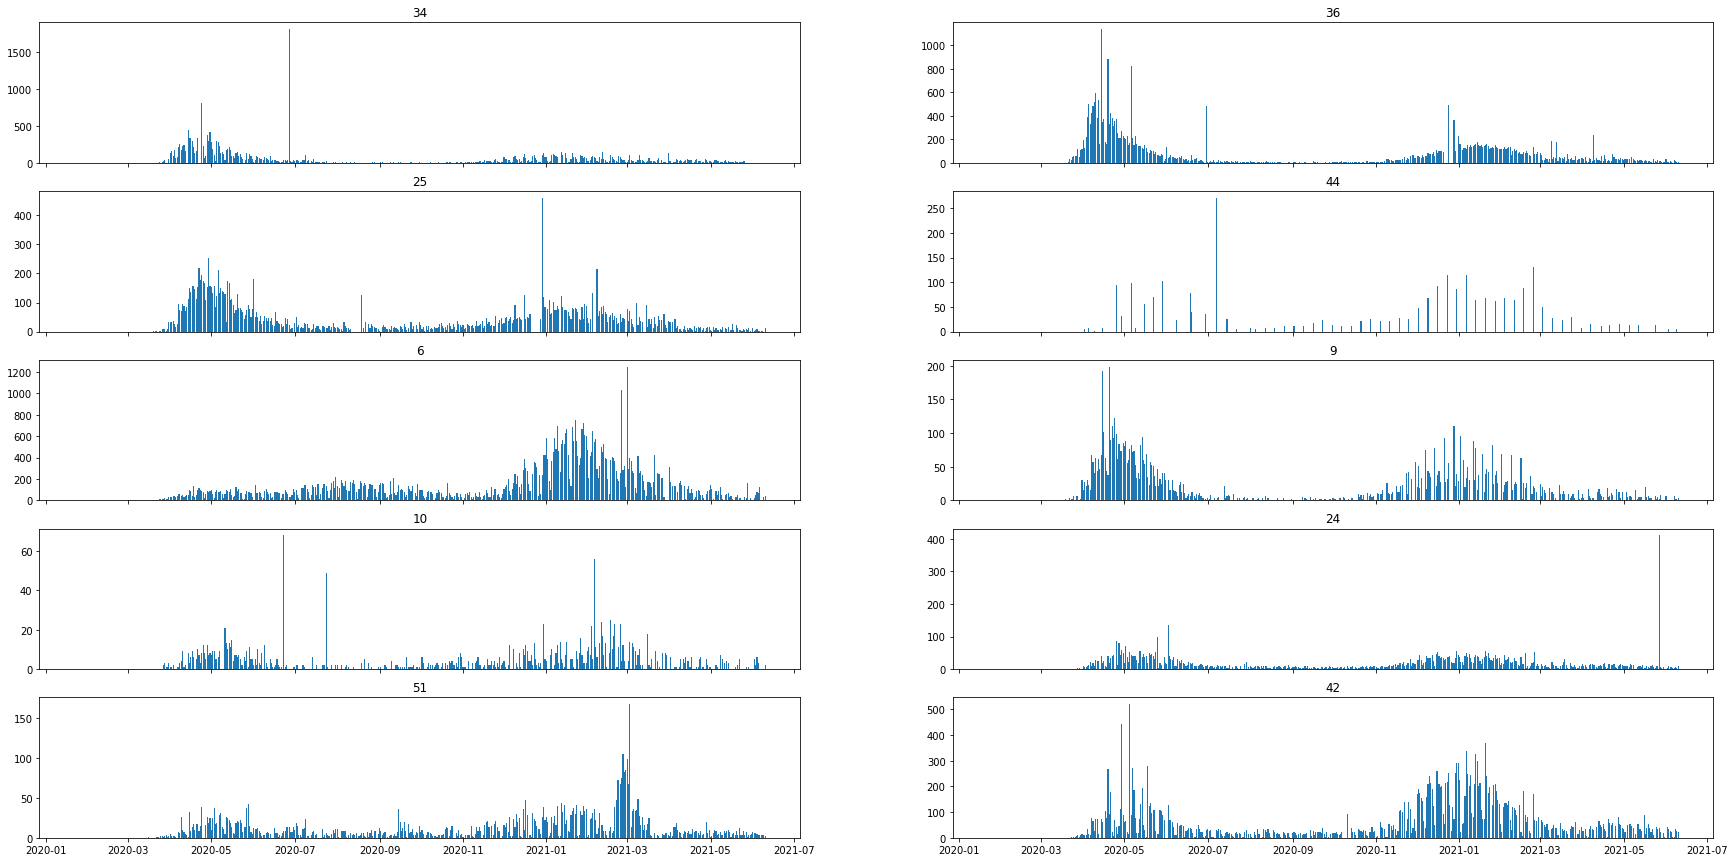

In [24]:
# top states with covid_19_DEATHS
plt.figure(figsize = (12,6))
fig,axes = plt.subplots(5,2,sharex = True,figsize = (30,15))

for i,ax in zip(high_case_10, axes.flat):    
    ax.bar(covid_climate.loc[np.where(covid_climate["state_fips"] == i)[0],'date'],covid_climate.loc[
        np.where(covid_climate["state_fips"] == i)[0],'covid_19_deaths'])
    ax.set_title(i)
    plt.title(str(i))

THE PATTERNS ARE SIMILAR TO COVID CASES . ALSO THE IS A SPIKE IN DEATH DURING INITIAL SPREAD AS WELL AS WINTERS.

<IPython.core.display.Javascript object>

state :  34
                          covid_19_confirmed_cases  covid_19_deaths
covid_19_confirmed_cases                  1.000000         0.144449
covid_19_deaths                           0.144449         1.000000


<IPython.core.display.Javascript object>

state :  34
                          covid_19_confirmed_cases  covid_19_deaths
covid_19_confirmed_cases                  1.000000         0.387399
covid_19_deaths                           0.387399         1.000000


<IPython.core.display.Javascript object>

state :  34
                          covid_19_confirmed_cases  covid_19_deaths
covid_19_confirmed_cases                  1.000000         0.413521
covid_19_deaths                           0.413521         1.000000


<IPython.core.display.Javascript object>

state :  34
                          covid_19_confirmed_cases  covid_19_deaths
covid_19_confirmed_cases                  1.000000         0.560899
covid_19_deaths                           0.560899         1.000000


<IPython.core.display.Javascript object>

state :  34
                          covid_19_confirmed_cases  covid_19_deaths
covid_19_confirmed_cases                   1.00000          0.57345
covid_19_deaths                            0.57345          1.00000


<IPython.core.display.Javascript object>

state :  34
                          covid_19_confirmed_cases  covid_19_deaths
covid_19_confirmed_cases                  1.000000         0.524025
covid_19_deaths                           0.524025         1.000000


<IPython.core.display.Javascript object>

state :  34
                          covid_19_confirmed_cases  covid_19_deaths
covid_19_confirmed_cases                  1.000000         0.154907
covid_19_deaths                           0.154907         1.000000


<IPython.core.display.Javascript object>

state :  34
                          covid_19_confirmed_cases  covid_19_deaths
covid_19_confirmed_cases                  1.000000         0.330573
covid_19_deaths                           0.330573         1.000000


<IPython.core.display.Javascript object>

state :  34
                          covid_19_confirmed_cases  covid_19_deaths
covid_19_confirmed_cases                  1.000000         0.350591
covid_19_deaths                           0.350591         1.000000


<IPython.core.display.Javascript object>

state :  34
                          covid_19_confirmed_cases  covid_19_deaths
covid_19_confirmed_cases                  1.000000         0.610209
covid_19_deaths                           0.610209         1.000000


<IPython.core.display.Javascript object>

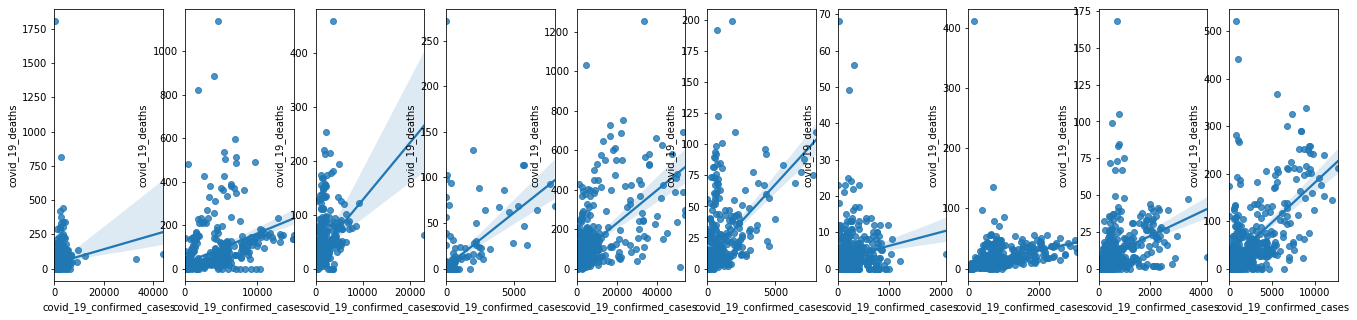

In [25]:
# confirmed case vs death
fig, axs = plt.subplots(ncols=10,figsize = (23,5))
for i in range(len(high_case_10)):
    print('state : ',high_case_10[0])
    print(covid_climate[covid_climate['state_fips'] == high_case_10[i]][['covid_19_confirmed_cases',
                                                                         'covid_19_deaths']].corr())
    sns.regplot("covid_19_confirmed_cases", "covid_19_deaths",
           data = covid_climate[covid_climate['state_fips'] == high_case_10[i]],ax=axs[i])

HERE WERE THAT THERE IS A CORRELATION OF COVID CASES WITH COVID DEATHS . THE RELATIONSHIP IS LOW AS IT IS PERIODICAL

<IPython.core.display.Javascript object>

state :  34
                          covid_19_confirmed_cases  daily_state_test
covid_19_confirmed_cases                  1.000000          0.187538
daily_state_test                          0.187538          1.000000


<IPython.core.display.Javascript object>

state :  36
                          covid_19_confirmed_cases  daily_state_test
covid_19_confirmed_cases                  1.000000          0.632657
daily_state_test                          0.632657          1.000000


<IPython.core.display.Javascript object>

state :  25
                          covid_19_confirmed_cases  daily_state_test
covid_19_confirmed_cases                  1.000000          0.485756
daily_state_test                          0.485756          1.000000


<IPython.core.display.Javascript object>

state :  44
                          covid_19_confirmed_cases  daily_state_test
covid_19_confirmed_cases                  1.000000          0.189226
daily_state_test                          0.189226          1.000000


<IPython.core.display.Javascript object>

state :  6
                          covid_19_confirmed_cases  daily_state_test
covid_19_confirmed_cases                  1.000000          0.646817
daily_state_test                          0.646817          1.000000


<IPython.core.display.Javascript object>

state :  9
                          covid_19_confirmed_cases  daily_state_test
covid_19_confirmed_cases                  1.000000          0.442518
daily_state_test                          0.442518          1.000000


<IPython.core.display.Javascript object>

state :  10
                          covid_19_confirmed_cases  daily_state_test
covid_19_confirmed_cases                  1.000000          0.658428
daily_state_test                          0.658428          1.000000


<IPython.core.display.Javascript object>

state :  24
                          covid_19_confirmed_cases  daily_state_test
covid_19_confirmed_cases                  1.000000          0.742554
daily_state_test                          0.742554          1.000000


<IPython.core.display.Javascript object>

state :  51
                          covid_19_confirmed_cases  daily_state_test
covid_19_confirmed_cases                   1.00000           0.74018
daily_state_test                           0.74018           1.00000


<IPython.core.display.Javascript object>

state :  42
                          covid_19_confirmed_cases  daily_state_test
covid_19_confirmed_cases                  1.000000          0.706532
daily_state_test                          0.706532          1.000000


<IPython.core.display.Javascript object>

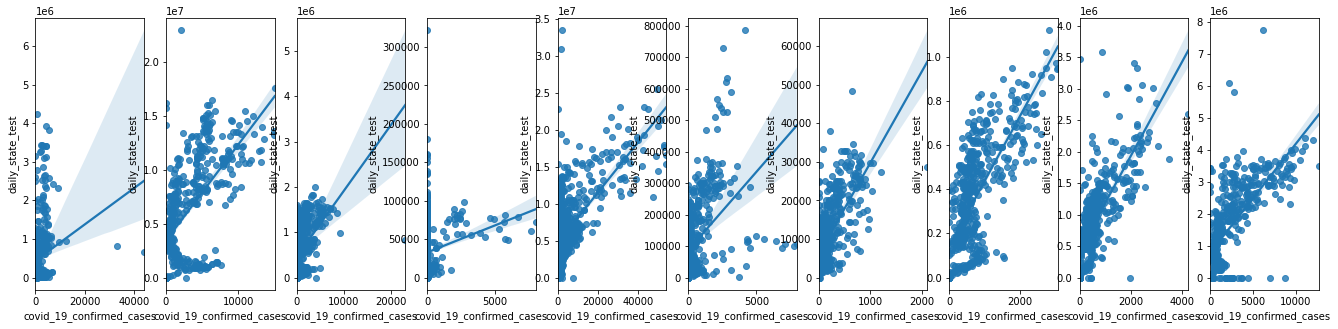

In [26]:
# confirmed case vs daily test
fig, axs = plt.subplots(ncols=10,figsize = (23,5))

for i in range(len(high_case_10)):
    print('state : ',high_case_10[i])
    print(covid_climate[covid_climate['state_fips'] == high_case_10[i]][['covid_19_confirmed_cases'
                                                                     ,'daily_state_test']].corr())
    sns.regplot("covid_19_confirmed_cases", "daily_state_test",
           data = covid_climate[covid_climate['state_fips'] == high_case_10[i]],ax=axs[i])

HERE WERE THAT THERE IS A CORRELATION OF COVID CASES WITH COVID TEST . THE RELATIONSHIP IS HIGH IN SOME CASES AND LOW IN OTHERS. IT MAY BE BECAUSE OF DIFFERENT POPULATION DENSITY

<IPython.core.display.Javascript object>

state :  34
                          temperature  covid_19_confirmed_cases
temperature                  1.000000                 -0.330697
covid_19_confirmed_cases    -0.330697                  1.000000


<IPython.core.display.Javascript object>

state :  36
                          temperature  covid_19_confirmed_cases
temperature                  1.000000                 -0.559317
covid_19_confirmed_cases    -0.559317                  1.000000


<IPython.core.display.Javascript object>

state :  25
                          temperature  covid_19_confirmed_cases
temperature                  1.000000                 -0.386904
covid_19_confirmed_cases    -0.386904                  1.000000


<IPython.core.display.Javascript object>

state :  44
                          temperature  covid_19_confirmed_cases
temperature                  1.000000                 -0.155207
covid_19_confirmed_cases    -0.155207                  1.000000


<IPython.core.display.Javascript object>

state :  6
                          temperature  covid_19_confirmed_cases
temperature                  1.000000                 -0.257718
covid_19_confirmed_cases    -0.257718                  1.000000


<IPython.core.display.Javascript object>

state :  9
                          temperature  covid_19_confirmed_cases
temperature                  1.000000                 -0.334381
covid_19_confirmed_cases    -0.334381                  1.000000


<IPython.core.display.Javascript object>

state :  10
                          temperature  covid_19_confirmed_cases
temperature                  1.000000                 -0.406969
covid_19_confirmed_cases    -0.406969                  1.000000


<IPython.core.display.Javascript object>

state :  24
                          temperature  covid_19_confirmed_cases
temperature                  1.000000                 -0.344651
covid_19_confirmed_cases    -0.344651                  1.000000


<IPython.core.display.Javascript object>

state :  51
                          temperature  covid_19_confirmed_cases
temperature                  1.000000                 -0.437565
covid_19_confirmed_cases    -0.437565                  1.000000


<IPython.core.display.Javascript object>

state :  42
                          temperature  covid_19_confirmed_cases
temperature                  1.000000                 -0.438336
covid_19_confirmed_cases    -0.438336                  1.000000


<IPython.core.display.Javascript object>

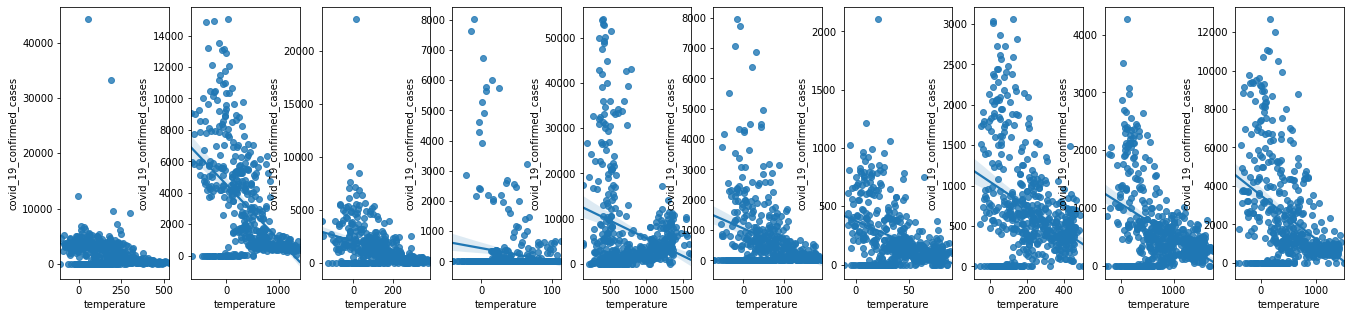

In [27]:
# temperature vs confirmed cases
fig, axs = plt.subplots(ncols=10,figsize = (23,5))

for i in range(len(high_case_10)):
    print('state : ',high_case_10[i])
    print(covid_climate[covid_climate['state_fips'] == high_case_10[i]][['temperature'
                                                                         ,'covid_19_confirmed_cases']].corr())
    sns.regplot("temperature", "covid_19_confirmed_cases",
               data = covid_climate[covid_climate['state_fips'] == high_case_10[i]],ax=axs[i])
   

HERE THERE IS NO DIRECT RELATIONSHIP BETWEEN TEMPERATURE VS COVID CASES

<IPython.core.display.Javascript object>

state :  34
                  temperature  daily_state_test
temperature          1.000000         -0.126529
daily_state_test    -0.126529          1.000000


<IPython.core.display.Javascript object>

state :  36
                  temperature  daily_state_test
temperature          1.000000         -0.284343
daily_state_test    -0.284343          1.000000


<IPython.core.display.Javascript object>

state :  25
                  temperature  daily_state_test
temperature          1.000000         -0.305979
daily_state_test    -0.305979          1.000000


<IPython.core.display.Javascript object>

state :  44
                  temperature  daily_state_test
temperature          1.000000         -0.237511
daily_state_test    -0.237511          1.000000


<IPython.core.display.Javascript object>

state :  6
                  temperature  daily_state_test
temperature          1.000000         -0.178462
daily_state_test    -0.178462          1.000000


<IPython.core.display.Javascript object>

state :  9
                  temperature  daily_state_test
temperature          1.000000         -0.158404
daily_state_test    -0.158404          1.000000


<IPython.core.display.Javascript object>

state :  10
                  temperature  daily_state_test
temperature           1.00000          -0.28101
daily_state_test     -0.28101           1.00000


<IPython.core.display.Javascript object>

state :  24
                  temperature  daily_state_test
temperature          1.000000         -0.164414
daily_state_test    -0.164414          1.000000


<IPython.core.display.Javascript object>

state :  51
                  temperature  daily_state_test
temperature          1.000000         -0.195064
daily_state_test    -0.195064          1.000000


<IPython.core.display.Javascript object>

state :  42
                  temperature  daily_state_test
temperature           1.00000          -0.23465
daily_state_test     -0.23465           1.00000


<IPython.core.display.Javascript object>

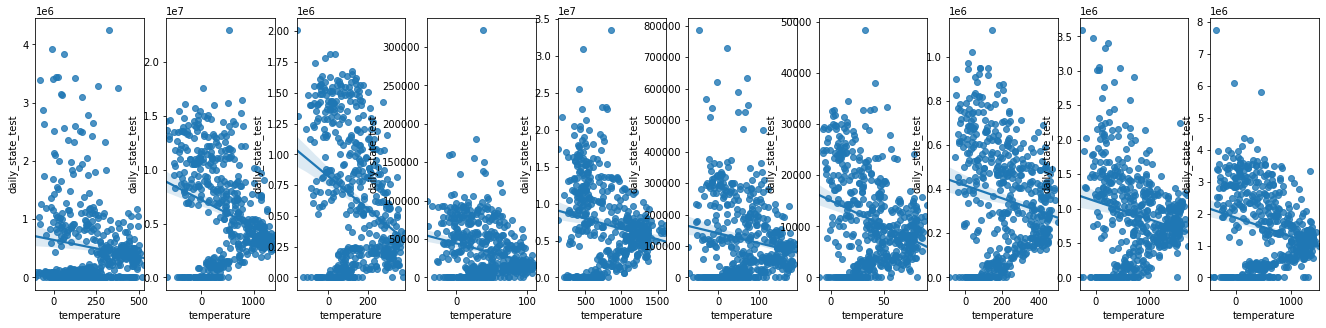

In [28]:
# temperature vs daily test
fig, axs = plt.subplots(ncols=10,figsize = (23,5))

for i in range(len(high_case_10)):
    print('state : ',high_case_10[i])
    print(covid_climate[covid_climate['state_fips'] == high_case_10[i]][['temperature'
                                                                 ,'daily_state_test']].corr())
    sns.regplot("temperature", "daily_state_test",
           data = covid_climate[covid_climate['state_fips'] == high_case_10[i]],ax=axs[i])

HERE WERE THAT THERE IS A NEGATIVE CORRELATION OF COVID CASES WITH COVID DEATHS . THE RELATIONSHIP IS LOW AS IT IS PERIODICAL

<IPython.core.display.Javascript object>

state :  34
                  precipitation  daily_state_test
precipitation          1.000000         -0.018469
daily_state_test      -0.018469          1.000000


<IPython.core.display.Javascript object>

state :  34
                  precipitation  daily_state_test
precipitation          1.000000          0.031649
daily_state_test       0.031649          1.000000


<IPython.core.display.Javascript object>

state :  34
                  precipitation  daily_state_test
precipitation          1.000000          0.007722
daily_state_test       0.007722          1.000000


<IPython.core.display.Javascript object>

state :  34
                  precipitation  daily_state_test
precipitation          1.000000          0.034003
daily_state_test       0.034003          1.000000


<IPython.core.display.Javascript object>

state :  34
                  precipitation  daily_state_test
precipitation          1.000000          0.056168
daily_state_test       0.056168          1.000000


<IPython.core.display.Javascript object>

state :  34
                  precipitation  daily_state_test
precipitation          1.000000          0.041256
daily_state_test       0.041256          1.000000


<IPython.core.display.Javascript object>

state :  34
                  precipitation  daily_state_test
precipitation          1.000000          0.007956
daily_state_test       0.007956          1.000000


<IPython.core.display.Javascript object>

state :  34
                  precipitation  daily_state_test
precipitation          1.000000          0.045132
daily_state_test       0.045132          1.000000


<IPython.core.display.Javascript object>

state :  34
                  precipitation  daily_state_test
precipitation          1.000000         -0.019599
daily_state_test      -0.019599          1.000000


<IPython.core.display.Javascript object>

state :  34
                  precipitation  daily_state_test
precipitation          1.000000          0.080045
daily_state_test       0.080045          1.000000


<IPython.core.display.Javascript object>

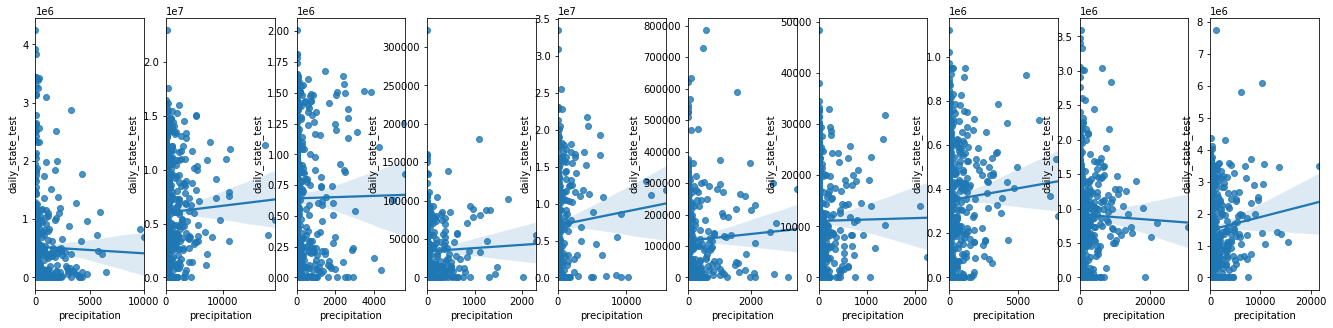

In [29]:
# precipitation vs daily test
fig, axs = plt.subplots(ncols=10,figsize = (23,5))

for i in range(len(high_case_10)):
    print('state : ',high_case_10[0])
    print(covid_climate[covid_climate['state_fips'] == high_case_10[i]][['precipitation'
                                                                         ,'daily_state_test']].corr())
    sns.regplot("precipitation", "daily_state_test",
               data = covid_climate[covid_climate['state_fips'] == high_case_10[i]],ax=axs[i])

NO RELATIONSHIP

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='date', ylabel='covid_19_deaths'>

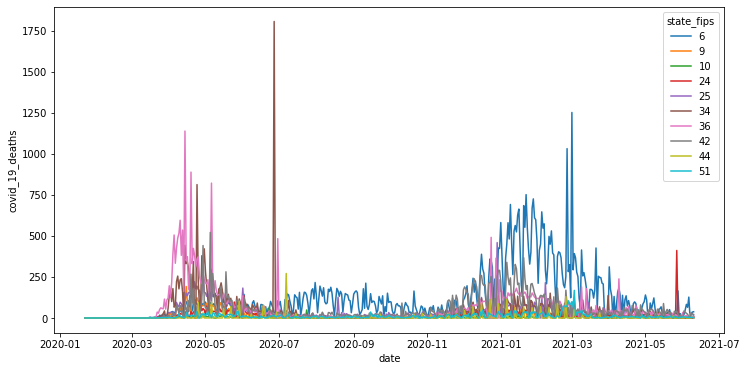

In [30]:
# top death in this five county
plt.figure(figsize = (12,6))
palette = sns.color_palette("tab10")
sns.lineplot(x = 'date', y = 'covid_19_deaths', hue = 'state_fips',data = covid_climate,palette = palette[:10])

In [31]:
# population_density vs total_population
# per county population density and total population stay same

<IPython.core.display.Javascript object>

state :  34
                          covid_19_confirmed_cases  virus_pressure
covid_19_confirmed_cases                  1.000000        0.975983
virus_pressure                            0.975983        1.000000


<IPython.core.display.Javascript object>

state :  36
                          covid_19_confirmed_cases  virus_pressure
covid_19_confirmed_cases                    1.0000          0.9879
virus_pressure                              0.9879          1.0000


<IPython.core.display.Javascript object>

state :  25
                          covid_19_confirmed_cases  virus_pressure
covid_19_confirmed_cases                  1.000000        0.977045
virus_pressure                            0.977045        1.000000


<IPython.core.display.Javascript object>

state :  44
                          covid_19_confirmed_cases  virus_pressure
covid_19_confirmed_cases                  1.000000        0.802902
virus_pressure                            0.802902        1.000000


<IPython.core.display.Javascript object>

state :  6
                          covid_19_confirmed_cases  virus_pressure
covid_19_confirmed_cases                  1.000000        0.999248
virus_pressure                            0.999248        1.000000


<IPython.core.display.Javascript object>

state :  9
                          covid_19_confirmed_cases  virus_pressure
covid_19_confirmed_cases                   1.00000         0.87532
virus_pressure                             0.87532         1.00000


<IPython.core.display.Javascript object>

state :  10
                          covid_19_confirmed_cases  virus_pressure
covid_19_confirmed_cases                  1.000000        0.815656
virus_pressure                            0.815656        1.000000


<IPython.core.display.Javascript object>

state :  24
                          covid_19_confirmed_cases  virus_pressure
covid_19_confirmed_cases                  1.000000        0.981457
virus_pressure                            0.981457        1.000000


<IPython.core.display.Javascript object>

state :  51
                          covid_19_confirmed_cases  virus_pressure
covid_19_confirmed_cases                  1.000000        0.985448
virus_pressure                            0.985448        1.000000


<IPython.core.display.Javascript object>

state :  42
                          covid_19_confirmed_cases  virus_pressure
covid_19_confirmed_cases                  1.000000        0.996992
virus_pressure                            0.996992        1.000000


<IPython.core.display.Javascript object>

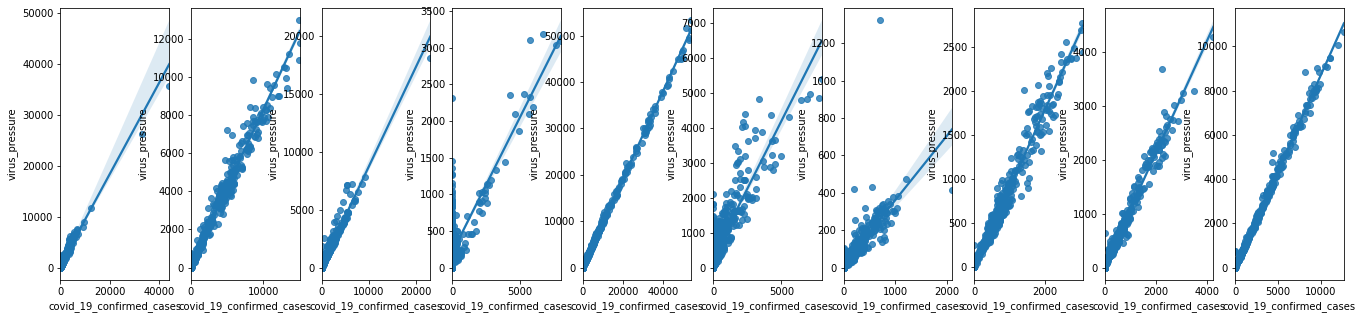

In [32]:
# confirmed case vs virus_pressure
fig, axs = plt.subplots(ncols=10,figsize = (23,5))

for i in range(len(high_case_10)):
    print('state : ',high_case_10[i])
    print(covid_climate[covid_climate['state_fips'] == high_case_10[i]][['covid_19_confirmed_cases'
                                                                         ,'virus_pressure']].corr())
    sns.regplot("covid_19_confirmed_cases", "virus_pressure",
               data = covid_climate[covid_climate['state_fips'] == high_case_10[i]],ax=axs[i])

HERE THERE IS A VERY HIGH CORRELATION BETWEEN VIRUS PRESSURE VS COVID CASES

<IPython.core.display.Javascript object>

state :  34
                 covid_19_deaths  virus_pressure
covid_19_deaths         1.000000        0.171354
virus_pressure          0.171354        1.000000


<IPython.core.display.Javascript object>

state :  36
                 covid_19_deaths  virus_pressure
covid_19_deaths         1.000000        0.376242
virus_pressure          0.376242        1.000000


<IPython.core.display.Javascript object>

state :  25
                 covid_19_deaths  virus_pressure
covid_19_deaths         1.000000        0.423028
virus_pressure          0.423028        1.000000


<IPython.core.display.Javascript object>

state :  44
                 covid_19_deaths  virus_pressure
covid_19_deaths         1.000000        0.440787
virus_pressure          0.440787        1.000000


<IPython.core.display.Javascript object>

state :  6
                 covid_19_deaths  virus_pressure
covid_19_deaths         1.000000        0.568234
virus_pressure          0.568234        1.000000


<IPython.core.display.Javascript object>

state :  9
                 covid_19_deaths  virus_pressure
covid_19_deaths         1.000000        0.524516
virus_pressure          0.524516        1.000000


<IPython.core.display.Javascript object>

state :  10
                 covid_19_deaths  virus_pressure
covid_19_deaths          1.00000         0.16933
virus_pressure           0.16933         1.00000


<IPython.core.display.Javascript object>

state :  24
                 covid_19_deaths  virus_pressure
covid_19_deaths         1.000000        0.326487
virus_pressure          0.326487        1.000000


<IPython.core.display.Javascript object>

state :  51
                 covid_19_deaths  virus_pressure
covid_19_deaths         1.000000        0.346591
virus_pressure          0.346591        1.000000


<IPython.core.display.Javascript object>

state :  42
                 covid_19_deaths  virus_pressure
covid_19_deaths         1.000000        0.617641
virus_pressure          0.617641        1.000000


<IPython.core.display.Javascript object>

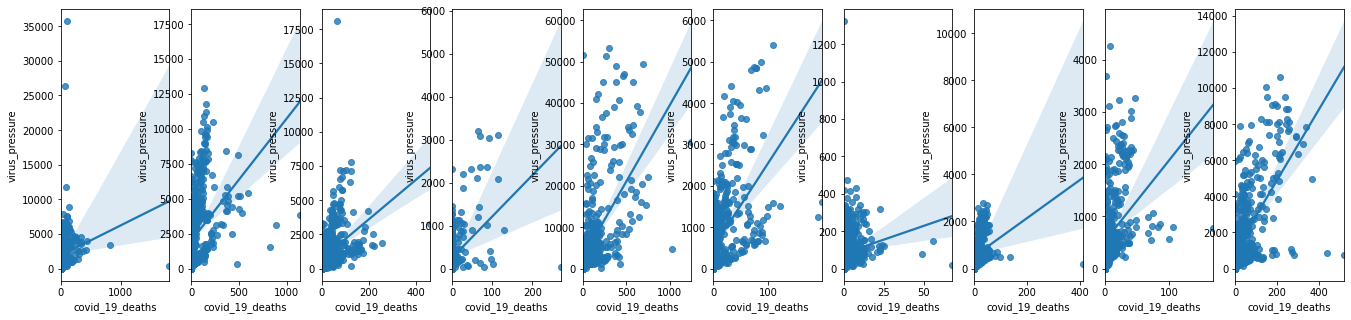

In [33]:
# covid death vs virus_pressure
fig, axs = plt.subplots(ncols=10,figsize = (23,5))

for i in range(len(high_case_10)):
    print('state : ',high_case_10[i])
    print(covid_climate[covid_climate['state_fips'] == high_case_10[i]][['covid_19_deaths'
                                                                         ,'virus_pressure']].corr())
    sns.regplot("covid_19_deaths", "virus_pressure",
               data = covid_climate[covid_climate['state_fips'] == high_case_10[i]],ax=axs[i])

HERE THERE IS A SIGNIFICANT RELATION BUT NOT DIRECTLY CORRELATED

<IPython.core.display.Javascript object>

state :  34
                  daily_state_test  virus_pressure
daily_state_test          1.000000        0.232939
virus_pressure            0.232939        1.000000


<IPython.core.display.Javascript object>

state :  36
                  daily_state_test  virus_pressure
daily_state_test          1.000000        0.649572
virus_pressure            0.649572        1.000000


<IPython.core.display.Javascript object>

state :  25
                  daily_state_test  virus_pressure
daily_state_test          1.000000        0.521314
virus_pressure            0.521314        1.000000


<IPython.core.display.Javascript object>

state :  44
                  daily_state_test  virus_pressure
daily_state_test          1.000000        0.388362
virus_pressure            0.388362        1.000000


<IPython.core.display.Javascript object>

state :  6
                  daily_state_test  virus_pressure
daily_state_test          1.000000        0.649291
virus_pressure            0.649291        1.000000


<IPython.core.display.Javascript object>

state :  9
                  daily_state_test  virus_pressure
daily_state_test          1.000000        0.479846
virus_pressure            0.479846        1.000000


<IPython.core.display.Javascript object>

state :  10
                  daily_state_test  virus_pressure
daily_state_test          1.000000        0.633819
virus_pressure            0.633819        1.000000


<IPython.core.display.Javascript object>

state :  24
                  daily_state_test  virus_pressure
daily_state_test          1.000000        0.755542
virus_pressure            0.755542        1.000000


<IPython.core.display.Javascript object>

state :  51
                  daily_state_test  virus_pressure
daily_state_test          1.000000        0.748017
virus_pressure            0.748017        1.000000


<IPython.core.display.Javascript object>

state :  42
                  daily_state_test  virus_pressure
daily_state_test          1.000000        0.712095
virus_pressure            0.712095        1.000000


<IPython.core.display.Javascript object>

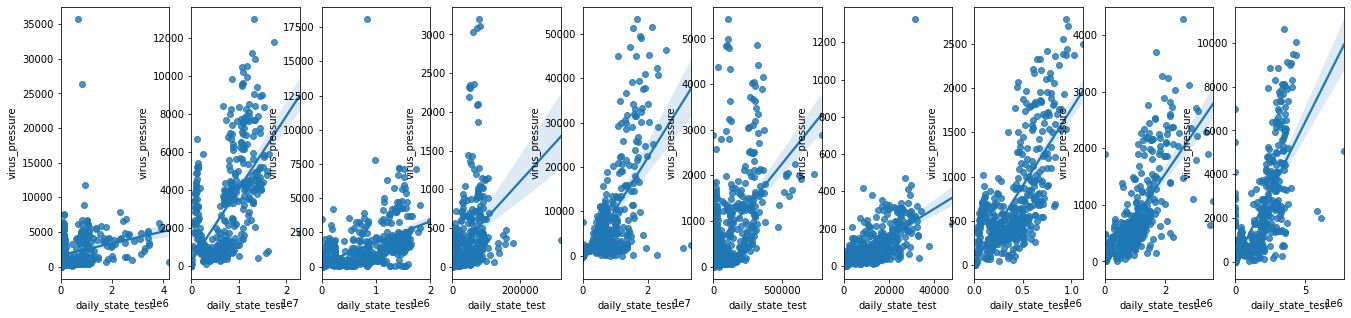

In [34]:
# daily_state_test vs virus_pressure
fig, axs = plt.subplots(ncols=10,figsize = (23,5))

for i in range(len(high_case_10)):
    print('state : ',high_case_10[i])
    print(covid_climate[covid_climate['state_fips'] == high_case_10[i]][['daily_state_test'
                                                                         ,'virus_pressure']].corr())
    sns.regplot("daily_state_test", "virus_pressure",
               data = covid_climate[covid_climate['state_fips'] == high_case_10[i]],ax=axs[i])

THERE IS A SIGNIFICANT CORRELATION

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='state', ylabel='death_ratio_mean'>

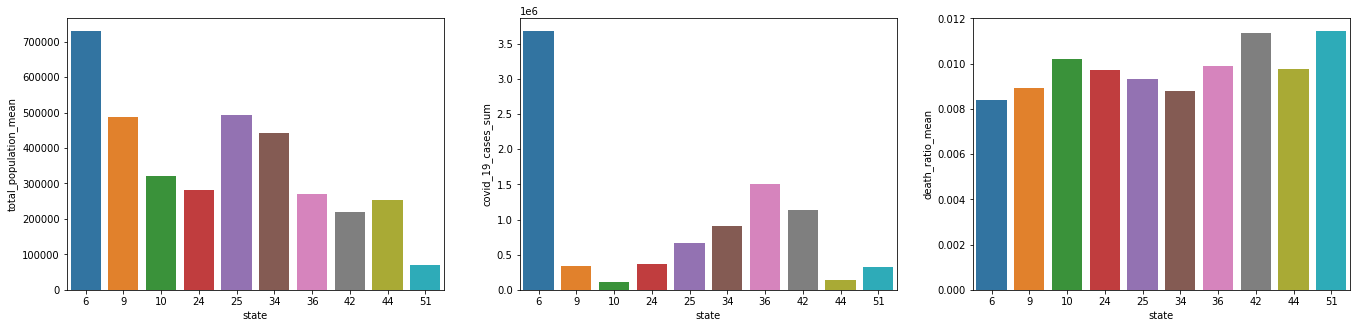

In [35]:
# total_population vs covid cases vs death ratio

covid_sum = []
pop_mean = []
death_mean = []
#print('state : ',high_case_10[0])
for i in range(len(high_case_10)):
    covid_sum.append(df_covid[df_covid['state_fips'] == high_case_10[i]]['covid_19_confirmed_cases'].sum())
    pop_mean.append(df_covid[df_covid['state_fips'] == high_case_10[i]]['total_population'].mean())
    death_mean.append(df_covid[df_covid['state_fips'] == high_case_10[i]]['death_ratio'].mean())


df_ta1 = pd.DataFrame({'state':high_case_10,'covid_19_cases_sum':covid_sum,
                       'total_population_mean':pop_mean,'death_ratio_mean':death_mean})

fig, axs = plt.subplots(ncols=3,figsize = (23,5))
sns.barplot(x = 'state',y ='covid_19_cases_sum',data = df_ta1 ,ax = axs[1])
sns.barplot(x = 'state',y ='total_population_mean',data = df_ta1 ,ax = axs[0])
sns.barplot(x = 'state',y ='death_ratio_mean',data = df_ta1 ,ax = axs[2])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='state_fips', ylabel='covid_19_deaths'>

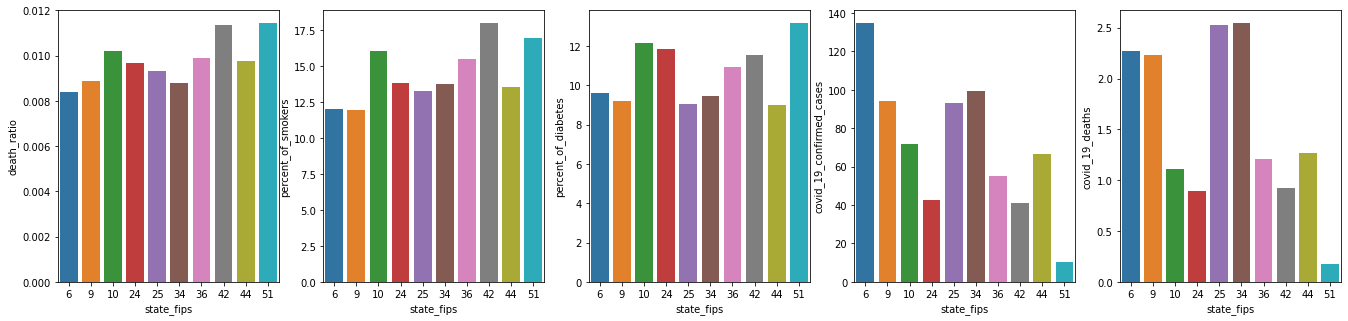

In [36]:
# death ratio, percent of smoker, diabetes, covid 19 death, covid 19 cases 

death_relation = df_covid[df_covid['state_fips'].isin(high_case_10)].groupby(['state_fips'])[['death_ratio',
            'percent_of_smokers','percent_of_diabetes','covid_19_deaths','covid_19_confirmed_cases']].mean().reset_index()

fig, axs = plt.subplots(ncols=5,figsize = (23,5))
sns.barplot(x = 'state_fips',y ='death_ratio',data = death_relation ,ax = axs[0])
sns.barplot(x = 'state_fips',y ='percent_of_smokers',data = death_relation ,ax = axs[1])
sns.barplot(x = 'state_fips',y ='percent_of_diabetes',data = death_relation ,ax = axs[2])
sns.barplot(x = 'state_fips',y ='covid_19_confirmed_cases',data = death_relation ,ax = axs[3])
sns.barplot(x = 'state_fips',y ='covid_19_deaths',data = death_relation ,ax = axs[4])
#death_relation.head()

DEATH RATIO, SMOKERS , AND DIABETES HAVE RELATIONSHIP AMONG THEMSELF

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='state_fips', ylabel='covid_19_confirmed_cases'>

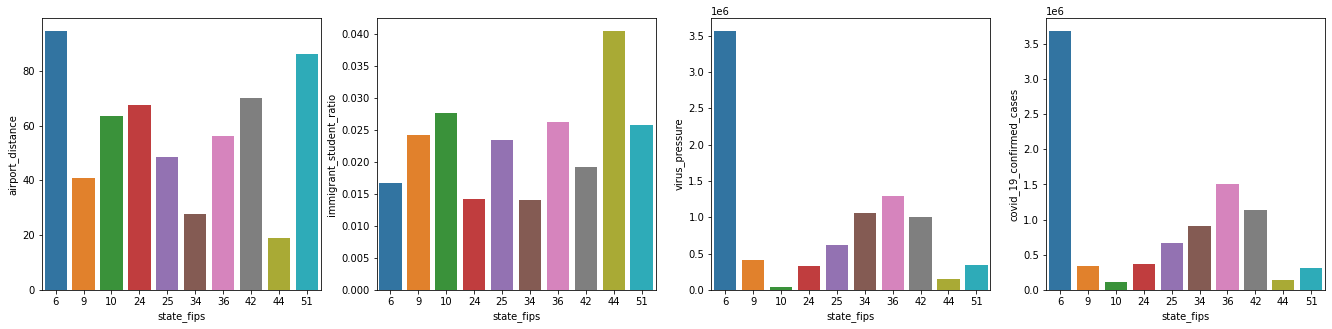

In [37]:
# airport distance , immigration student ratio covid cases , virus pressure
covid_spread1 = df_covid[df_covid['state_fips'].isin(high_case_10)].groupby(['state_fips'])[['airport_distance',
            'immigrant_student_ratio']].mean().reset_index()

covid_spread2 = df_covid[df_covid['state_fips'].isin(high_case_10)].groupby(['state_fips'])[['virus_pressure',
            'covid_19_confirmed_cases']].sum().reset_index()

fig, axs = plt.subplots(ncols=4,figsize = (23,5))
sns.barplot(x = 'state_fips',y ='airport_distance',data = covid_spread1 ,ax = axs[0])
sns.barplot(x = 'state_fips',y ='immigrant_student_ratio',data = covid_spread1 ,ax = axs[1])
sns.barplot(x = 'state_fips',y ='virus_pressure',data = covid_spread2 ,ax = axs[2])
sns.barplot(x = 'state_fips',y ='covid_19_confirmed_cases',data = covid_spread2 ,ax = axs[3])

HERE MORE THE DISTANCE LESS THE IMMIGRATION RATIO

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='state', ylabel='covid_19_cases_sum'>

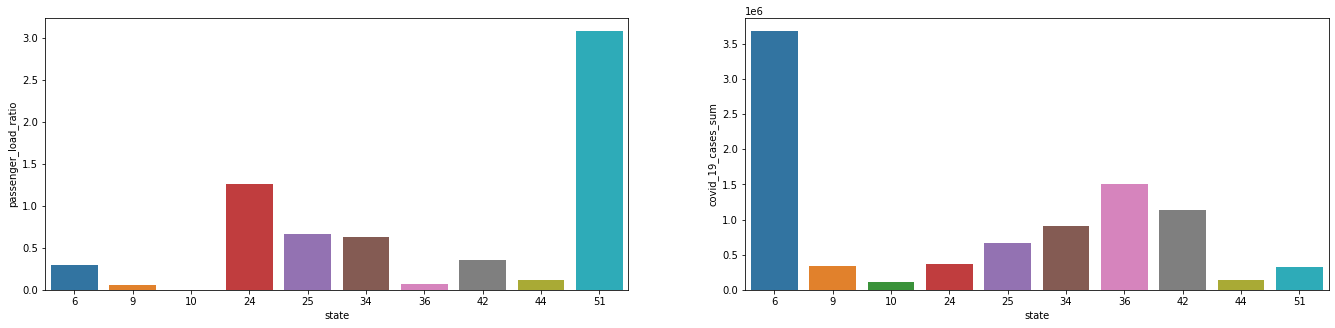

In [38]:
# geography
pass_load = []
cov_sum = []
for i in range(len(high_case_10)):
    pass_load.append(df_covid[df_covid['state_fips'] == high_case_10[i]]['passenger_load_ratio'].mean())
    cov_sum.append(df_covid[df_covid['state_fips'] == high_case_10[i]]['covid_19_confirmed_cases'].sum())

df_geo = pd.DataFrame({'state':high_case_10,'covid_19_cases_sum':cov_sum,
                       'passenger_load_ratio':pass_load})

fig, axs = plt.subplots(ncols=2,figsize = (23,5))
sns.barplot(x = 'state',y ='passenger_load_ratio',data = df_geo ,ax = axs[0])
sns.barplot(x = 'state',y ='covid_19_cases_sum',data = df_geo ,ax = axs[1])

HERE PASSENGER RATIO LESS, MORE COVID CASES

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='state', ylabel='number_of_meat_plants'>

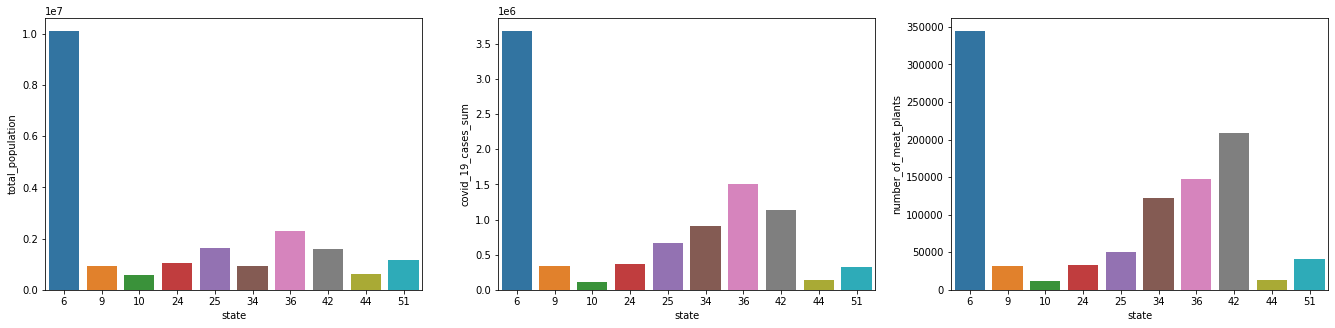

In [39]:
# geography
pop = []
cov_sum = []
meat_mean = []
for i in range(len(high_case_10)):
    pop.append(df_covid[df_covid['state_fips'] == high_case_10[i]]['total_population'].max())
    meat_mean.append(df_covid[df_covid['state_fips'] == high_case_10[i]]['number_of_meat_plants'].sum())
    cov_sum.append(df_covid[df_covid['state_fips'] == high_case_10[i]]['covid_19_confirmed_cases'].sum())

df_geo = pd.DataFrame({'state':high_case_10,'covid_19_cases_sum':cov_sum,
                       'number_of_meat_plants':meat_mean,'total_population':pop})

fig, axs = plt.subplots(ncols=3,figsize = (23,5))
sns.barplot(x = 'state',y ='total_population',data = df_geo ,ax = axs[0])
sns.barplot(x = 'state',y ='covid_19_cases_sum',data = df_geo ,ax = axs[1])
sns.barplot(x = 'state',y ='number_of_meat_plants',data = df_geo ,ax = axs[2])

MORE POPULATION , MORE MEAT PLANT. MORE POPULATION , MORE CASES. BUT WE CANNOT SAY MORE MEAT PLANT RESULT IN MORE CASES.

In [40]:
# percent of insured 
df_insured = df_covid[df_covid['state_fips'].isin(high_case_10)]

grp1 = df_insured.groupby(['state_fips'])[['percent_of_insured_residents','covid_19_confirmed_cases']].mean().reset_index()

#sns.barplot(x = 'state_fips', y ='covid_19_confirmed_cases',order = grp1['percent_of_insured_residents'],data = grp1)
grp1.head()

,state_fips,percent_of_insured_residents,covid_19_confirmed_cases
0,6,92.216157,134.778510
1,9,94.356782,94.385940
2,10,93.614031,71.825428
3,24,93.449569,42.455592
4,25,96.543843,93.378458


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='state', ylabel='median_household_income'>

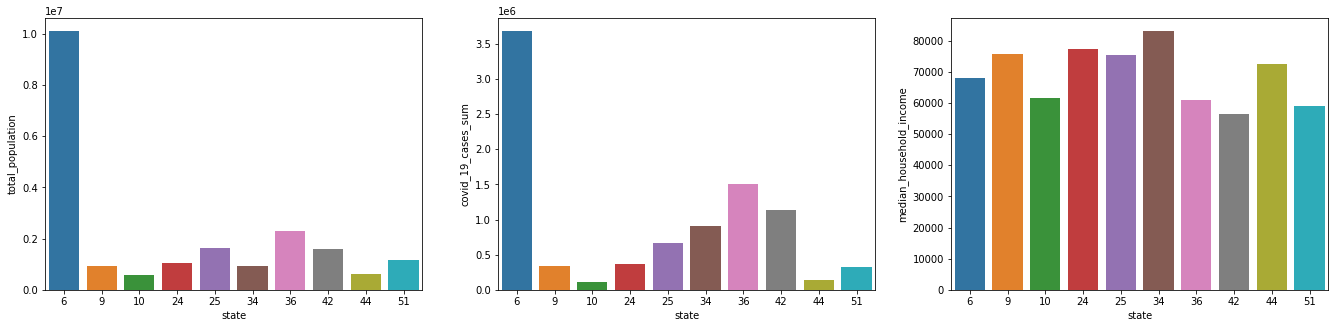

In [41]:
# # covid cases fix

pop = []
cov_sum = []
income_mean = []
for i in range(len(high_case_10)):
    pop.append(df_covid[df_covid['state_fips'] == high_case_10[i]]['total_population'].max())
    income_mean.append(df_covid[df_covid['state_fips'] == high_case_10[i]]['median_household_income'].mean())
    cov_sum.append(df_covid[df_covid['state_fips'] == high_case_10[i]]['covid_19_confirmed_cases'].sum())

df_geo = pd.DataFrame({'state':high_case_10,'covid_19_cases_sum':cov_sum,
                       'median_household_income':income_mean,'total_population':pop})

fig, axs = plt.subplots(ncols=3,figsize = (23,5))
sns.barplot(x = 'state',y ='total_population',data = df_geo ,ax = axs[0])
sns.barplot(x = 'state',y ='covid_19_cases_sum',data = df_geo ,ax = axs[1])
sns.barplot(x = 'state',y ='median_household_income',data = df_geo ,ax = axs[2])

In [42]:
# Modelling

In [43]:
df_covid1 = df_covid.copy()
df_covid1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992266 entries, 0 to 992265
Data columns (total 64 columns):
 #   Column                                         Non-Null Count   Dtype         
---  ------                                         --------------   -----         
 0   date                                           992266 non-null  datetime64[ns]
 1   county_fips                                    992266 non-null  int64         
 2   county_name                                    992266 non-null  object        
 3   state_fips                                     992266 non-null  int64         
 4   state_name                                     992266 non-null  object        
 5   covid_19_confirmed_cases                       992266 non-null  float64       
 6   covid_19_deaths                                992266 non-null  float64       
 7   social_distancing_total_grade                  992266 non-null  object        
 8   social_distancing_visitation_grade          

In [44]:
# casuality_load
df_covid1['casuality_per_1000'] = (df_covid1['covid_19_confirmed_cases']/df_covid1['total_population'])*1000
df_covid1['death_per_1000'] = (df_covid1['covid_19_deaths']/df_covid1['total_population'])*1000
df_covid1['death_casuality_ratio'] = (df_covid1['covid_19_deaths']/df_covid1['covid_19_confirmed_cases'])

In [45]:
df_covid1['death_casuality_ratio'].fillna(method = 'bfill',inplace = True)
df_covid1 = df_covid1.dropna()
df_covid1['death_casuality_ratio']

0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
            ...   
992260    0.000000
992261    0.000000
992262    0.000000
992263    0.333333
992264    0.000000
Name: death_casuality_ratio, Length: 992265, dtype: float64

In [46]:
df_train = df_covid1[['date','state_fips','total_population','number_of_meat_plants','covid_19_confirmed_cases',
                    'daily_state_test','temperature','virus_pressure','social_distancing_total_grade',
                     'political_party','religious_congregation_ratio'
                     ,'percent_of_vaccinated_residents']].copy()
df_train = df_train[df_train['state_fips'].isin(high_case_10)]
df_train.head()

,date,state_fips,total_population,number_of_meat_plants,covid_19_confirmed_cases,daily_state_test,temperature,virus_pressure,social_distancing_total_grade,political_party,religious_congregation_ratio,percent_of_vaccinated_residents
61226,2020-01-22,6,1666753,56,0.0,1.0,5.88,0.0,F,1,34.0,0.0
61227,2020-01-23,6,1666753,56,0.0,1.0,8.92,0.0,F,1,34.0,0.0
61228,2020-01-24,6,1666753,56,0.0,0.0,9.32,0.0,F,1,34.0,0.0
61229,2020-01-25,6,1666753,56,0.0,0.0,11.72,0.0,F,1,34.0,0.0
61230,2020-01-26,6,1666753,56,0.0,0.0,7.30,0.0,F,1,34.0,0.0


In [47]:
df_train.dropna(inplace = True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145222 entries, 61226 to 921425
Data columns (total 12 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   date                             145222 non-null  datetime64[ns]
 1   state_fips                       145222 non-null  int64         
 2   total_population                 145222 non-null  int64         
 3   number_of_meat_plants            145222 non-null  int64         
 4   covid_19_confirmed_cases         145222 non-null  float64       
 5   daily_state_test                 145222 non-null  float64       
 6   temperature                      145222 non-null  float64       
 7   virus_pressure                   145222 non-null  float64       
 8   social_distancing_total_grade    145222 non-null  object        
 9   political_party                  145222 non-null  int64         
 10  religious_congregation_ratio     145222 

In [48]:
# handling date attributes
df_train['day_wk'] = df_train.date.dt.dayofweek
df_train['year'] = df_train.date.dt.year
df_train['month'] = df_train.date.dt.month
df_train['quarter'] = df_train.date.dt.quarter
df_train.head()

,date,state_fips,total_population,number_of_meat_plants,covid_19_confirmed_cases,daily_state_test,temperature,virus_pressure,social_distancing_total_grade,political_party,religious_congregation_ratio,percent_of_vaccinated_residents,day_wk,year,month,quarter
61226,2020-01-22,6,1666753,56,0.0,1.0,5.88,0.0,F,1,34.0,0.0,2,2020,1,1
61227,2020-01-23,6,1666753,56,0.0,1.0,8.92,0.0,F,1,34.0,0.0,3,2020,1,1
61228,2020-01-24,6,1666753,56,0.0,0.0,9.32,0.0,F,1,34.0,0.0,4,2020,1,1
61229,2020-01-25,6,1666753,56,0.0,0.0,11.72,0.0,F,1,34.0,0.0,5,2020,1,1
61230,2020-01-26,6,1666753,56,0.0,0.0,7.30,0.0,F,1,34.0,0.0,6,2020,1,1


In [49]:
high_case_10

[34, 36, 25, 44, 6, 9, 10, 24, 51, 42]

In [50]:
len(df_covid[(df_covid['date'] <= '2021-03-01')])

794205

In [51]:
len(df_covid[(df_covid['date'] >= '2021-03-01')])

200022

In [52]:
# train test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df_train.loc[:,~df_train.columns.isin(['covid_19_confirmed_cases'
                                                                                        ,'date'])]
                                    ,df_train['covid_19_confirmed_cases'],test_size = 0.3,shuffle = True)


X_train.head()

,state_fips,total_population,number_of_meat_plants,daily_state_test,temperature,virus_pressure,social_distancing_total_grade,political_party,religious_congregation_ratio,percent_of_vaccinated_residents,day_wk,year,month,quarter
731668,42,51276,4,35947.0,15.80,4.857143,D,1,52.0,41.6,3,2021,6,2
368800,24,29163,2,17562.0,7.00,17.333333,F,0,37.0,18.7,0,2021,3,1
728816,42,40763,3,21138.0,22.18,1.400000,D,1,32.0,0.0,3,2020,7,3
729255,42,44785,2,9374.0,2.80,2.166667,F,1,34.0,0.0,6,2020,5,2
533054,34,507078,8,21474.0,20.60,15.750000,F,1,54.0,0.0,0,2020,9,3


In [53]:
y_test.head()

899254    0.0
921263    1.0
919842    1.0
709925    0.0
729094    7.0
Name: covid_19_confirmed_cases, dtype: float64

In [54]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43567 entries, 899254 to 81905
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   state_fips                       43567 non-null  int64  
 1   total_population                 43567 non-null  int64  
 2   number_of_meat_plants            43567 non-null  int64  
 3   daily_state_test                 43567 non-null  float64
 4   temperature                      43567 non-null  float64
 5   virus_pressure                   43567 non-null  float64
 6   social_distancing_total_grade    43567 non-null  object 
 7   political_party                  43567 non-null  int64  
 8   religious_congregation_ratio     43567 non-null  float64
 9   percent_of_vaccinated_residents  43567 non-null  float64
 10  day_wk                           43567 non-null  int64  
 11  year                             43567 non-null  int64  
 12  month        

In [55]:
# categorical encoding
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([('encoder',OneHotEncoder(),[0,6,7,11,12,13,14])],remainder = 'passthrough')
sc = StandardScaler(with_mean=False)

X_train_tr = ct.fit_transform(X_train)
X_train_tr = sc.fit_transform(X_train_tr)
X_test_tr = ct.transform(X_test)
X_test_tr = sc.transform(X_test_tr)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

ValueError: all features must be in [0, 13] or [-14, 0]

In [ ]:
# model
model_xgb = xgb.XGBRegressor(learning_rate = 0.1,n_estimators = 1000,max_depth = 5).fit(X_train_tr,y_train)

In [ ]:
y_pred = model_xgb.predict(X_test_tr)

metrics.r2_score(y_test,y_pred)

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

In [ ]:
y_test.mean()

In [ ]:
 model_xgb.feature_importances_

In [ ]:
plt.figure(figsize = (12,6))
plot_test = df_train.loc[y_test.index]
plot_test.head()
plot_test['predicted_cases'] = y_pred
sns.lineplot(x = plot_test['date'],
             y = plot_test['covid_19_confirmed_cases'],linestyle='--' ,legend = True)
sns.lineplot(x = plot_test['date'],
             y = plot_test['predicted_cases'],legend = True)

In [ ]:
plt.figure(figsize = (12,6))
sns.lineplot(x = plot_test[plot_test['date'] >= '2021-03-01'].date,
             y = plot_test['covid_19_confirmed_cases'],linestyle='--' ,legend = True)
sns.lineplot(x = plot_test[plot_test['date'] >= '2021-03-01'].date,
             y = plot_test['predicted_cases'],legend = True)

In [ ]:
X_test_tr

In [ ]:
plot_test.head()

In [ ]:
#plot_test.to_csv('dataset/prediction_xgb.csv',index = False)

In [ ]:
# ANN
# from tensorflow.keras.callbacks import EarlyStopping

# ann_model = tf.keras.models.Sequential()
# ann_model.add(tf.keras.layers.Input(shape=(X_train_tr.shape[1],), sparse=True))
# ann_model.add(tf.keras.layers.Dense(126,activation = 'relu'))
# ann_model.add(tf.keras.layers.Dense(126,activation = 'relu'))
# ann_model.add(tf.keras.layers.Dense(1)) 
# ann_model.compile(loss = 'mean_squared_error',optimizer = 'adam',metrics=[
#         'MeanSquaredError',
#         'AUC'])
# history = ann_model.fit(X_train_tr,y_train,batch_size = 100, epochs = 150,
#                         validation_data = (X_test_tr,y_test), callbacks = EarlyStopping(patience = 10))


In [ ]:
# plt.plot(history.history['loss'], label = 'train')
# plt.plot(history.history['val_loss'], label = 'test')
# plt.legend()
# plt.show()

In [ ]:
# y_pred_ann = ann_model.predict(X_test_tr)

# metrics.r2_score(y_test,y_pred_ann)

In [ ]:
# np.sqrt(metrics.mean_squared_error(y_test,y_pred_ann))

In [ ]:
# plt.figure(figsize = (12,6))
# plot_test = df_train.loc[y_test.index]
# plot_test.head()
# plot_test['predicted_cases'] = y_pred_ann
# sns.lineplot(x = plot_test['date'],
#              y = plot_test['covid_19_confirmed_cases'],linestyle='--' ,legend = True)
# sns.lineplot(x = plot_test['date'],
#              y = plot_test['predicted_cases'],legend = True)

In [ ]:
# plt.figure(figsize = (12,6))
# sns.lineplot(x = plot_test[plot_test['date'] >= '2021-03-01'].date,
#              y = plot_test['covid_19_confirmed_cases'],linestyle='--' ,legend = True)
# sns.lineplot(x = plot_test[plot_test['date'] >= '2021-03-01'].date,
#              y = plot_test['predicted_cases'],legend = True)

In [ ]:
# SVR
# from sklearn.svm import SVR
# svr = SVR(kernel = 'rbf').fit(X_train_tr,y_train)

# y_pred_svr = svr.predict(X_test_tr)

# print(metrics.r2_score(y_test,y_pred_svr))
# print(np.sqrt(metrics.mean_squared_error(y_test,y_pred_svr)))

In [ ]:
# from catboost import CatBoostRegressor

# params = {'loss_function':'RMSE',
#           'eval_metric':'RMSE',
#           'iterations':2000,
#           'learning_rate':0.1,
#           'cat_features':[0,6,7,11,12,13,14],# need to be handled or encoded
#           'verbose':200,
#           'random_seed':13}

# catmodel = CatBoostRegressor(**params).fit(X_train,y_train,eval_set = (X_test,y_test),use_best_model = True)

In [ ]:
# y_pred3 = catmodel.predict(X_test)

# metrics.r2_score(y_test,y_pred3)

In [ ]:
# np.sqrt(metrics.mean_squared_error(y_test,y_pred3))

In [ ]:
# feature_imp = catmodel.get_feature_importance(prettified = True)

# plt.figure(figsize = (12,6))
# sns.barplot(data = feature_imp, x = 'Feature Id', y = 'Importances')
# plt.xticks(rotation = 90)
# plt.title('Feature Importance')

In [ ]:
# plt.figure(figsize = (12,6))
# plot_test = df_train.loc[y_test.index]
# plot_test.head()
# plot_test['predicted_cases'] = y_pred3
# sns.lineplot(x = plot_test['date'],
#              y = plot_test['covid_19_confirmed_cases'],linestyle='--' ,legend = True)
# sns.lineplot(x = plot_test['date'],
#              y = plot_test['predicted_cases'],legend = True)

In [ ]:
# plt.figure(figsize = (12,6))
# sns.lineplot(x = plot_test[plot_test['date'] >= '2021-03-01'].date,
#              y = plot_test['covid_19_confirmed_cases'],linestyle='--' ,legend = True)
# sns.lineplot(x = plot_test[plot_test['date'] >= '2021-03-01'].date,
#              y = plot_test['predicted_cases'],legend = True)